<a href="https://colab.research.google.com/github/hadeelfarash/Chicago_Crime_TimeSeriesAnalysis/blob/main/Project_3_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
fpath ='/content/drive/MyDrive/CodingDojo/04-DataViz/Week16/Data/Crimes_-_2001_to_Present.csv'
df = pd.read_csv(fpath)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


##Supplemental Data: Holiday Data


In [2]:
!pip install holidays

In [3]:
import holidays
import datetime as dt
from holidays import country_holidays

In [4]:
## making a date range that covers full dataset
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-02 01:00:00',
               '2001-01-03 01:00:00', '2001-01-04 01:00:00',
               '2001-01-05 01:00:00', '2001-01-06 01:00:00',
               '2001-01-07 01:00:00', '2001-01-08 01:00:00',
               '2001-01-09 01:00:00', '2001-01-10 01:00:00',
               ...
               '2022-12-22 01:00:00', '2022-12-23 01:00:00',
               '2022-12-24 01:00:00', '2022-12-25 01:00:00',
               '2022-12-26 01:00:00', '2022-12-27 01:00:00',
               '2022-12-28 01:00:00', '2022-12-29 01:00:00',
               '2022-12-30 01:00:00', '2022-12-31 01:00:00'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [5]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [6]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 01:00:00


"New Year's Day"

In [7]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [8]:
# For a specific subdivisions (e.g. state or province):
md_holidays = country_holidays('US', subdiv='MD')
md_holidays

holidays.country_holidays('US', subdiv='MD')

In [9]:
## Saving both holiday types as columns
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df['MD Holiday'] = [md_holidays.get(day) for day in df['Date']]
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,US Holiday,MD Holiday
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN,None,None
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None


##keep 2 forms of the data:
The original individual crime data with a datetime index. (Each row is 1 crime)
A resampled/converted crime counts version (Each row is 1 day)

In [10]:
df['datetime'] = pd.to_datetime(df['Date'])
df=df.set_index('datetime')
# original_data = df.copy()



In [11]:
# daily_crime_counts = df.resample('D').size()
# daily_crime_counts

In [12]:
# original_data.head()

##Topic 1) Comparing Police Districts
**Which district had the most crimes in 2022?**

**Which had the least?**

In [14]:
df2022=df.loc['2022']


<Axes: >

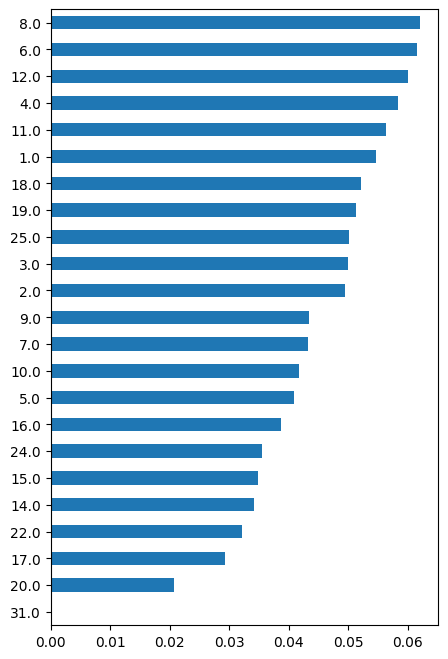

In [15]:
crime_counts = df2022['District'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))

In [16]:
ts=df.groupby('Primary Type').resample('Y').count()


In [17]:

ts.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'US Holiday', 'MD Holiday'],
      dtype='object')

In [18]:

ts=ts['ID']

In [19]:
ts=ts.to_frame()

In [20]:
df['Primary Type'].unique()


array(['DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'THEFT', 'BATTERY',
       'ASSAULT', 'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'SEX OFFENSE', 'BURGLARY', 'NARCOTICS', 'LIQUOR LAW VIOLATION',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS', 'ROBBERY',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'OBSCENITY',
       'INTIMIDATION', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


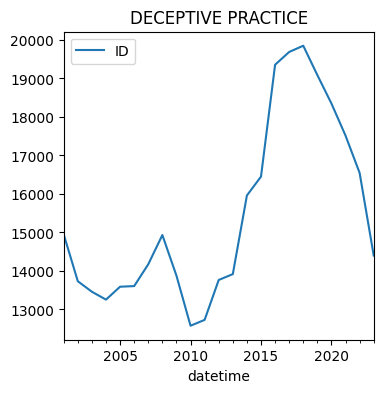

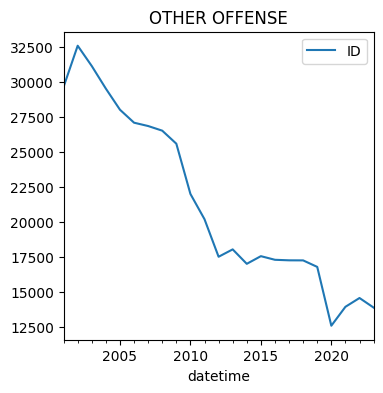

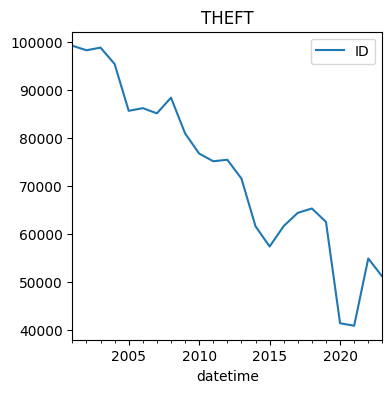

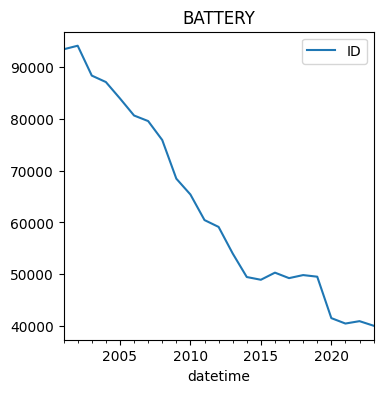

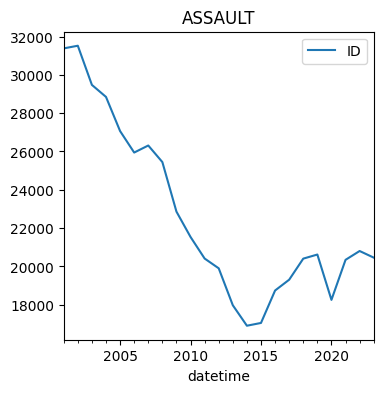

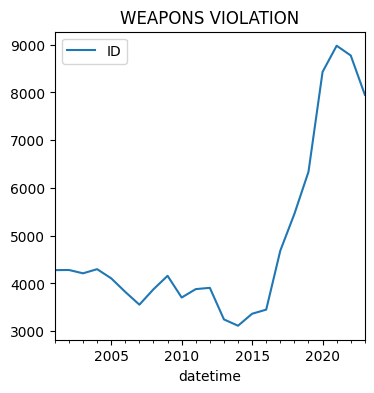

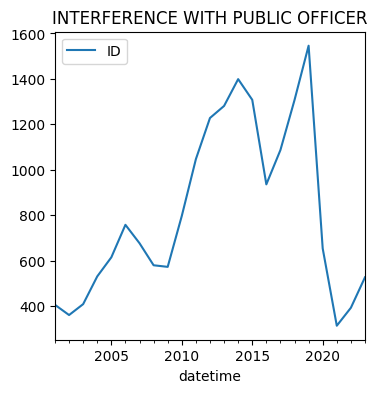

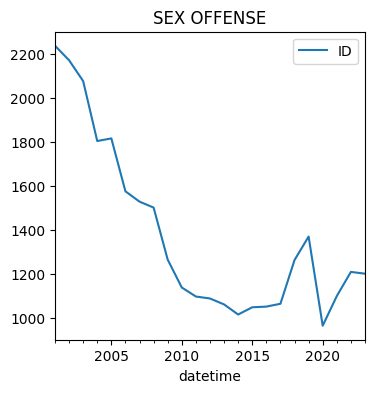

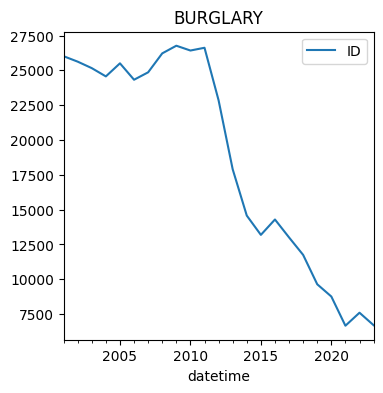

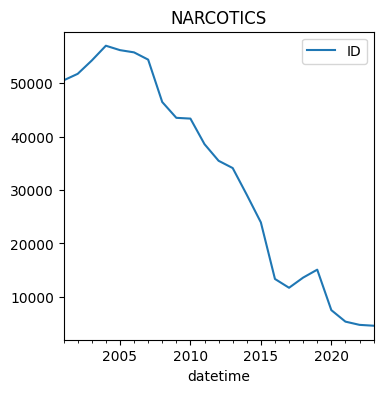

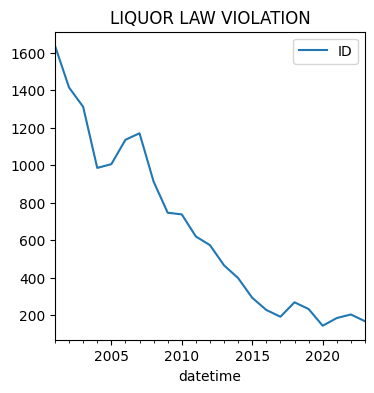

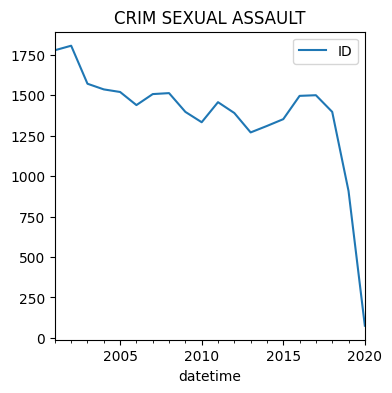

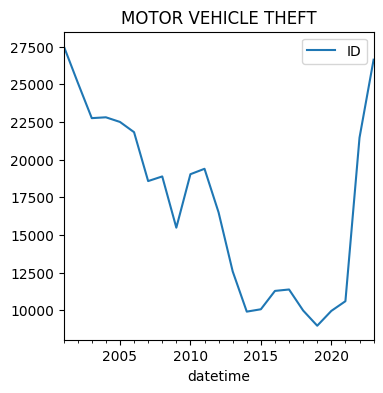

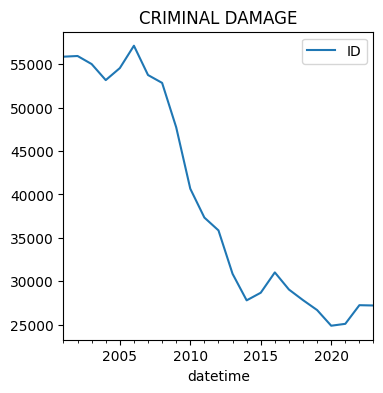

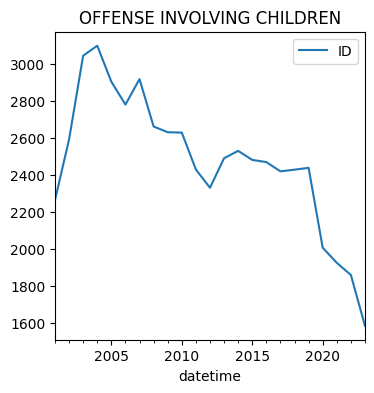

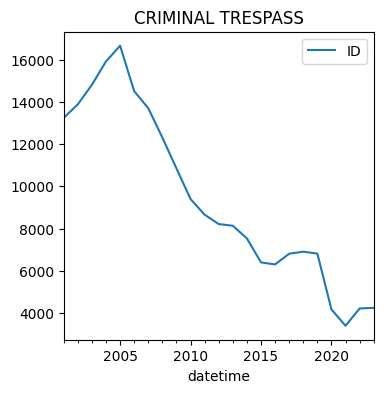

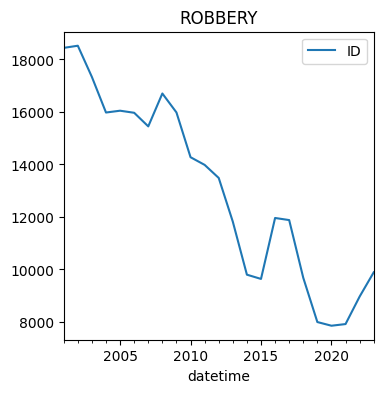

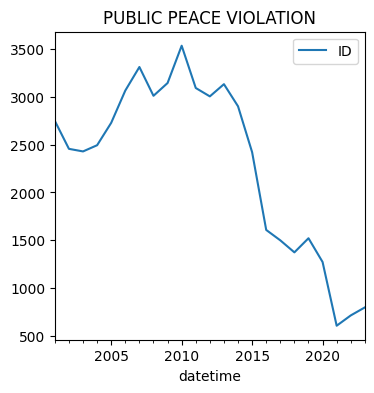

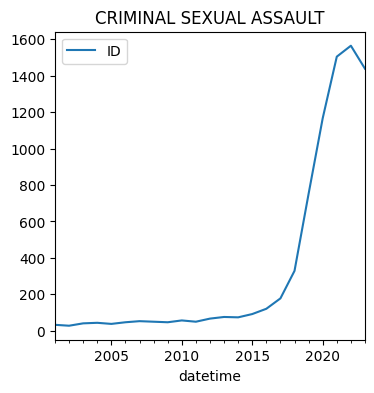

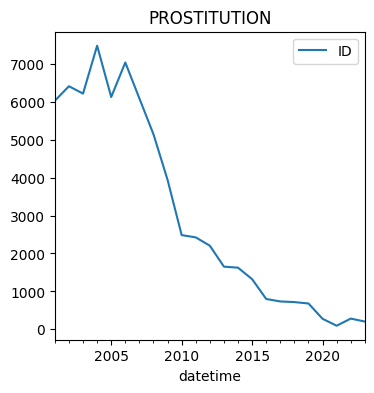

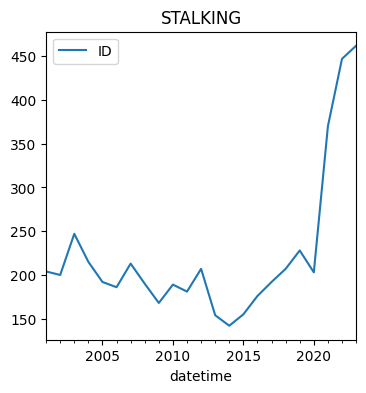

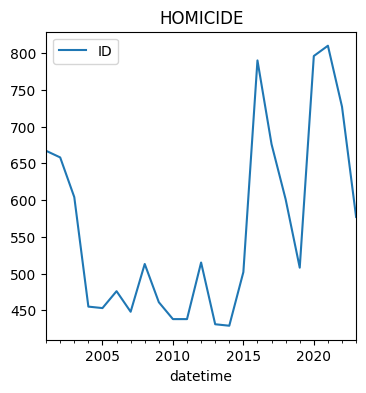

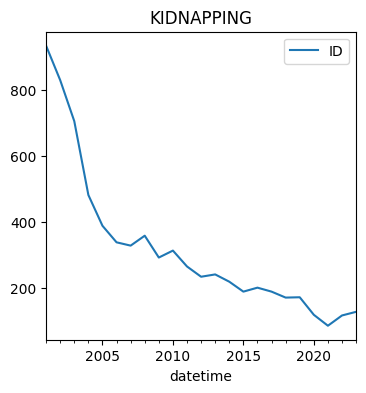

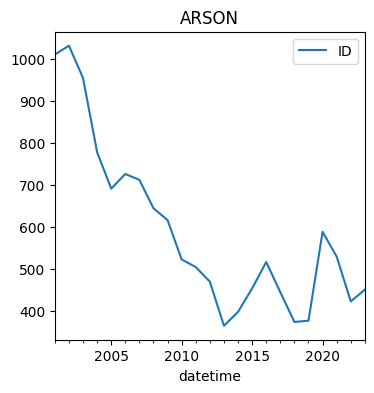

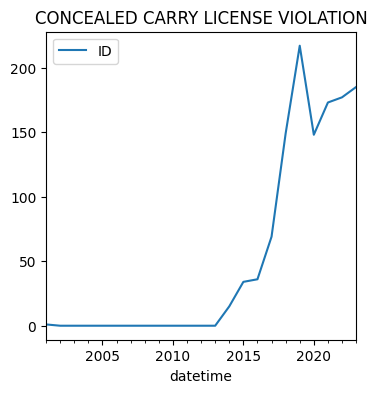

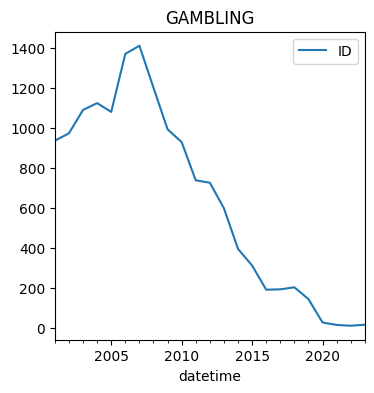

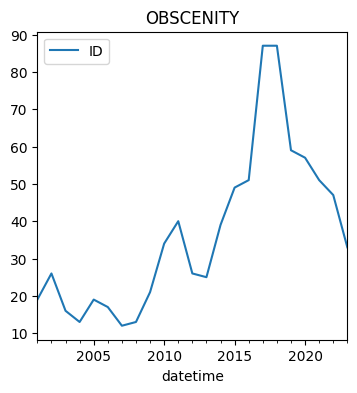

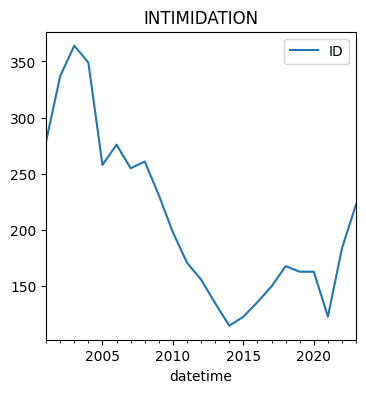

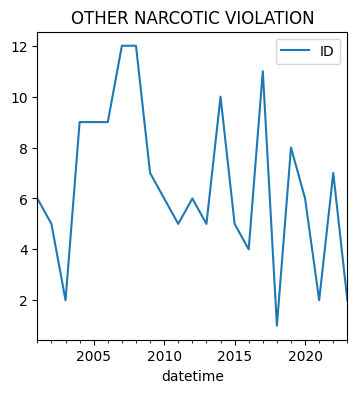

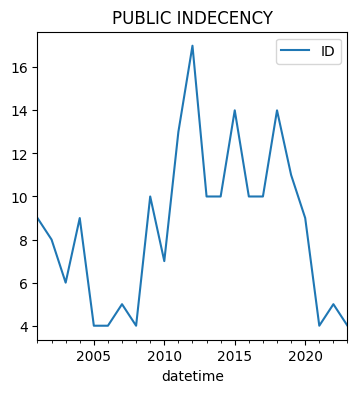

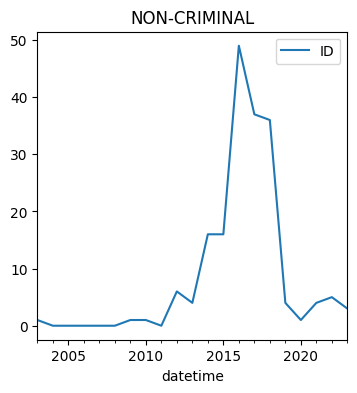

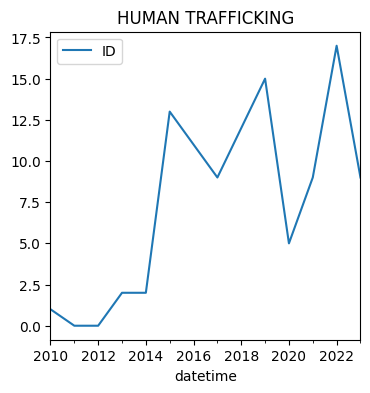

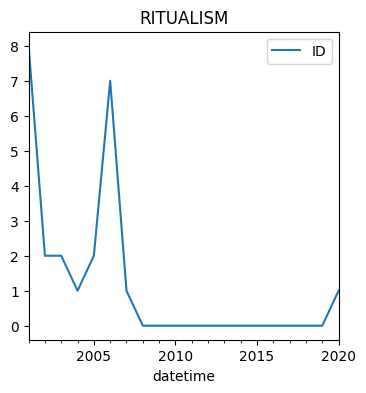

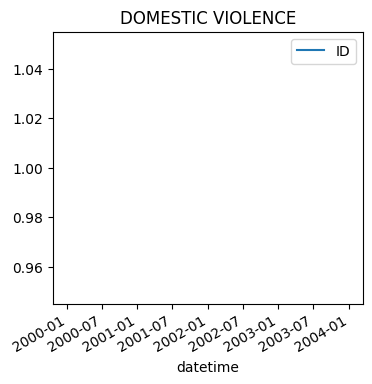

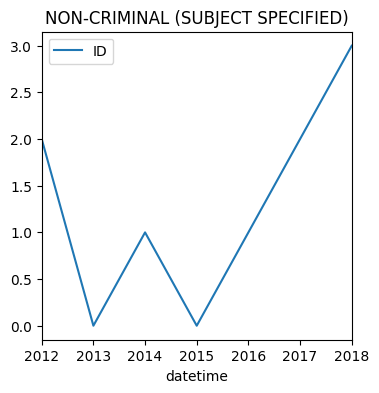

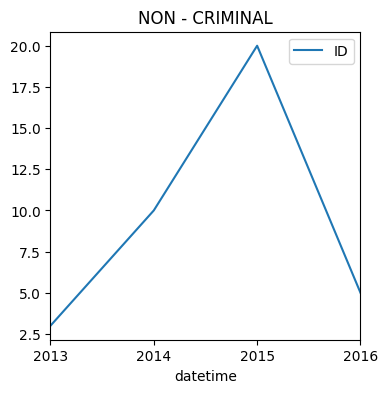

In [21]:

for x in df['Primary Type'].unique():

   ts.loc[x].plot(figsize=(4,4),title=x)